### Connecting to Google Drive

In [1]:
# from google.colab import drive
# drive.mount("/content/gdrive")

### Imports

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
import tensorflow as tf

2024-11-14 15:41:02.114378: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-14 15:41:02.115964: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-14 15:41:02.143613: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-14 15:41:02.144464: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-14 15:41:02.592689: W tensorflow/compiler/tf2t

In [3]:
from traditional_models import *
from data_processor import *
from deep_models import *
from utils import *

In [ ]:
# seed for everything
seed = 42
random.seed(seed)  # Python's random module
np.random.seed(seed)  # Numpy's random module
torch.manual_seed(seed)  # PyTorch
torch.cuda.manual_seed(seed)  # For CUDA-enabled GPUs
torch.cuda.manual_seed_all(seed)  # For multi-GPU
torch.backends.cudnn.deterministic = True  # For reproducibility in CuDNN
torch.backends.cudnn.benchmark = False  # Disable to ensure deterministic behavior

In [4]:
Result_Export_Path = 'Results/'

## Data Processor

In [8]:
%%time

dp = DatasetProcessor()
print('1.Split Adresses...')
train, test = dp.get_file_name(path='content/gdrive/MyDrive/Datasets/SisFall_dataset/')

print('2.Extract Features and Labels...')
print('------------------------Train Dataset')
train_dataset = dp.datasets_to_nparray(train)
print('------------------------Test Dataset')
test_dataset = dp.datasets_to_nparray(test)

print('3.Windowing...')
print('------------------------Train Dataset')
X_train, y_train = dp.windowing3d(train_dataset)
print('------------------------Test Dataset')
X_test, y_test = dp.windowing3d(test_dataset)

print('4.Normalizing...')
scaler = StandardScaler()
X_train, X_test = dp.normalizer(scaler, X_train, X_test)

print('5.Calculate Class Weight...')
class_weight = dp.generate_class_weight(y_train)


1.Split Adresses...
2.Extract Features and Labels...
------------------------Train Dataset


100%|████████| 3382/3382 [00:22<00:00, 147.78it/s]


------------------------Test Dataset


100%|████████| 1014/1014 [00:07<00:00, 127.09it/s]


3.Windowing...
------------------------Train Dataset
------------------------Test Dataset
4.Normalizing...
5.Calculate Class Weight...
CPU times: user 32.2 s, sys: 1.95 s, total: 34.1 s
Wall time: 34 s


### Save & Load

In [5]:
save_data = False
if save_data:
  
  save_pickle(X_train, 'content/gdrive/MyDrive/Datasets/X_train.pkl')
  save_pickle(y_train, 'content/gdrive/MyDrive/Datasets/y_train.pkl')
  save_pickle(X_test, 'content/gdrive/MyDrive/Datasets/X_test.pkl')
  save_pickle(y_test, 'content/gdrive/MyDrive/Datasets/y_test.pkl')

else:
  X_train = load_pickle('content/gdrive/MyDrive/Datasets/X_train.pkl')
  y_train = load_pickle('content/gdrive/MyDrive/Datasets/y_train.pkl')
  X_test = load_pickle('content/gdrive/MyDrive/Datasets/X_test.pkl')
  y_test = load_pickle('content/gdrive/MyDrive/Datasets/y_test.pkl')
  data_processor = DatasetProcessor()
  class_weight = data_processor.generate_class_weight(y_train)

In [6]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (49649, 200, 9)
y_train shape: (49649,)
X_test shape: (27761, 200, 9)
y_test shape: (27761,)


## Traditional Models

### initialization of Parameters

In [9]:
model_parameters = {'KNN':{'n_neighbors':[2,4,8,16], 'metric':['euclidean','cosine']},
                    'Random Forest':{'criterion':['gini', 'entropy', 'log_loss']},
                    'Decision Tree':{'criterion':['gini', 'entropy', 'log_loss']},
                    }


tradional_models = Traditional_Models(models = {'Logistic Regression':LogisticRegression(class_weight=class_weight, max_iter=500),
                                                'Random Forest':RandomForestClassifier(class_weight=class_weight),
                                                'KNN':KNeighborsClassifier(),
                                                'Decision Tree': DecisionTreeClassifier(class_weight=class_weight)},
                                      model_parameters = model_parameters)

### Training & Evaluation

1) Reducing dimension of feature matrices...
2) Feature selection...
3) Generating validation matrices for hyper-parameter tuning...
4) Train & Evaluation...

----------------- Working on Logistic Regression -----------------




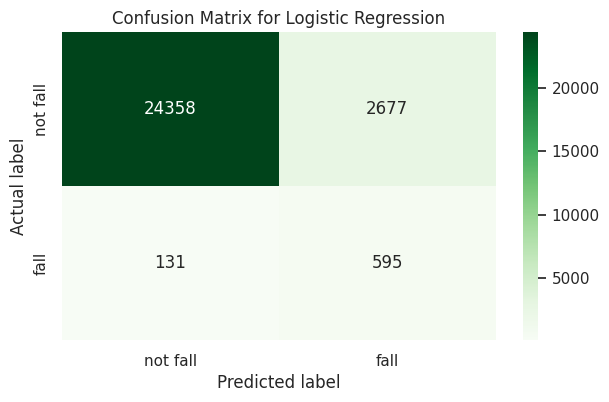



----------------- Working on Random Forest -----------------



/home/jing-yu-lim/miniconda3/envs/tf-fall/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


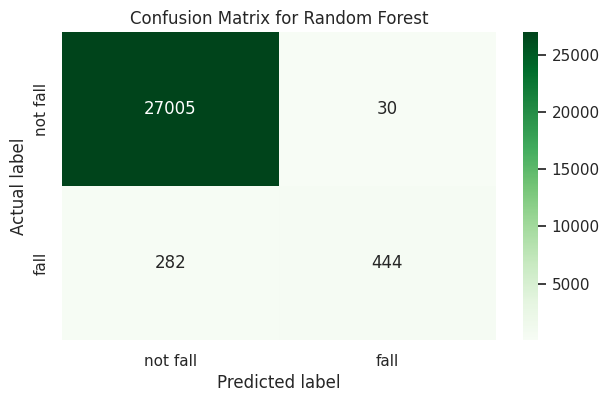



----------------- Working on KNN -----------------



/home/jing-yu-lim/miniconda3/envs/tf-fall/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


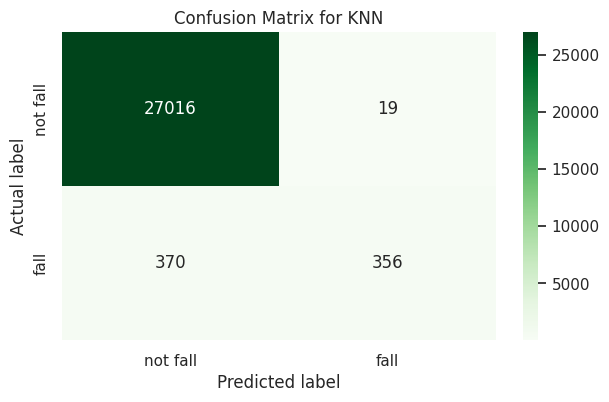



----------------- Working on Decision Tree -----------------



/home/jing-yu-lim/miniconda3/envs/tf-fall/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


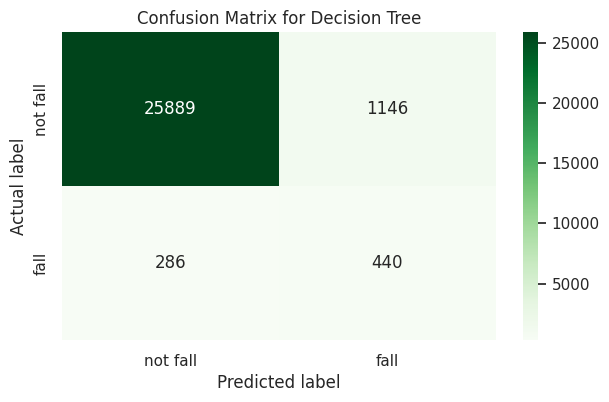

In [10]:
predictions, results = tradional_models.pipeline(X_train,
                                                 y_train,
                                                 X_test,
                                                 y_test,
                                                 class_weight)

### Save Results

In [14]:
save_pickle(predictions, Result_Export_Path + 'predictions.pkl')
save_pickle(results, Result_Export_Path + 'results.pkl')

## Deep Models

#### Load Results

In [7]:
predictions = load_pickle(Result_Export_Path + 'predictions.pkl')
results = load_pickle( Result_Export_Path + 'results.pkl')

### Train & Evaluation

In [8]:
train_evaluate_deep = Train_Evaluate_Deep(predictions=predictions,
                                          results=results)

#### CNN + MLP

In [9]:
print('1. Build Model...')
cnn_model = train_evaluate_deep.build_cnn(input_size=X_train.shape[1:])

1. Build Model...


2024-11-11 20:19:51.330135: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [48]:
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 9)]          0         
                                                                 
 conv1 (Conv1D)              (None, 200, 16)           1312      
                                                                 
 conv2 (Conv1D)              (None, 200, 32)           4640      
                                                                 
 conv3 (Conv1D)              (None, 200, 64)           18496     
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 512)               6554112   
                                                                 
 dropout (Dropout)           (None, 512)               0     

In [10]:
%%time
print('2. Train Model...')
cnn_history = train_evaluate_deep.train_deep_model(cnn_model,
                                                   X_train,
                                                   y_train,
                                                   optimizer=tf.optimizers.SGD(learning_rate=0.001),
                                                   loss_function=keras.losses.BinaryCrossentropy(),
                                                   callbacks=[get_early_stopping(metric='val_PRC', patience=10, mode='max')],
                                                   metrics=get_classifiaction_metrics(),
                                                   class_weight=class_weight,
                                                   epochs=30)


2. Train Model...
----------------------------------
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 9)]          0         
                                                                 
 conv1 (Conv1D)              (None, 200, 16)           1312      
                                                                 
 conv2 (Conv1D)              (None, 200, 32)           4640      
                                                                 
 conv3 (Conv1D)              (None, 200, 64)           18496     
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 512)               6554112   
                                                                 
 dropout

3. Evaluation...
217/217 [==============================] - 1s 4ms/step



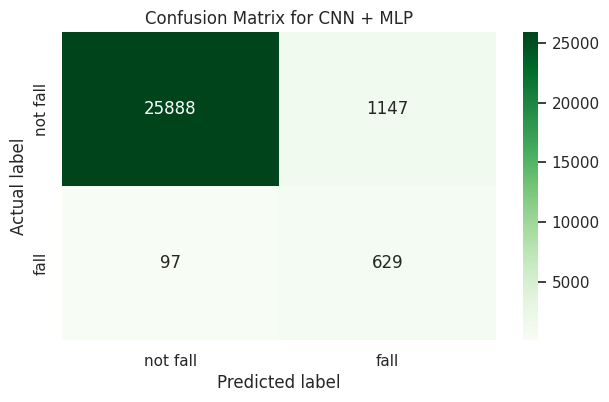


CPU times: user 8.99 s, sys: 319 ms, total: 9.31 s
Wall time: 1.35 s


In [11]:
%%time
print('3. Evaluation...')
prediction = train_evaluate_deep.evaluate(cnn_model, X_test, y_test, batch_size=128, threshold=0.9, title='CNN + MLP', model_name='CNN + MLP', plot=False)


In [12]:
plot_learning_curves=False
if plot_learning_curves:
  print('4. Plot learning curves...')
  _ = train_evaluate_deep.plot_learning_curves(cnn_history)

#### CNN + LSTM

In [13]:
X_train.shape[1:]

(200, 9)

In [14]:
print('1. Build Model...')
LSTM_model = train_evaluate_deep.build_lstm(input_size=X_train.shape[1:])

1. Build Model...


2024-11-11 20:21:43.483529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-11 20:21:43.484768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-11 20:21:43.485451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [47]:
LSTM_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 9)]          0         
                                                                 
 lstm1 (LSTM)                (None, 200, 8)            576       
                                                                 
 lstm2 (LSTM)                (None, 200, 16)           1600      
                                                                 
 lstm3 (LSTM)                (None, 200, 32)           6272      
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               3277312   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0   

In [15]:
%%time
print('2. Train Model...')
LSTM_history = train_evaluate_deep.train_deep_model(LSTM_model,
                                                   X_train,
                                                   y_train,
                                                   optimizer=tf.optimizers.SGD(learning_rate=0.001),
                                                   loss_function=keras.losses.BinaryCrossentropy(),
                                                   callbacks=[get_early_stopping(metric='val_PRC', patience=10, mode='max')],
                                                   metrics=get_classifiaction_metrics(),
                                                   class_weight=class_weight,
                                                   epochs=30)


2. Train Model...
----------------------------------
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 9)]          0         
                                                                 
 lstm1 (LSTM)                (None, 200, 8)            576       
                                                                 
 lstm2 (LSTM)                (None, 200, 16)           1600      
                                                                 
 lstm3 (LSTM)                (None, 200, 32)           6272      
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               3277312   
                                                                 
 dropo

2024-11-11 20:21:43.928806: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-11 20:21:43.930052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-11 20:21:43.930711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

311/311 [==============================] - ETA: 0s - loss: 0.7291 - TP: 1917.0000 - FP: 25308.0000 - TN: 11739.0000 - FN: 755.0000 - Accuracy: 0.3438 - Precision: 0.0704 - Recall: 0.7174 - AUC: 0.6759 - PRC: 0.2936

2024-11-11 20:22:15.701214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-11 20:22:15.702702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-11 20:22:15.703336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

311/311 [==============================] - 35s 106ms/step - loss: 0.7291 - TP: 1917.0000 - FP: 25308.0000 - TN: 11739.0000 - FN: 755.0000 - Accuracy: 0.3438 - Precision: 0.0704 - Recall: 0.7174 - AUC: 0.6759 - PRC: 0.2936 - val_loss: 0.7197 - val_TP: 117.0000 - val_FP: 7249.0000 - val_TN: 2554.0000 - val_FN: 10.0000 - val_Accuracy: 0.2690 - val_Precision: 0.0159 - val_Recall: 0.9213 - val_AUC: 0.8261 - val_PRC: 0.0666
Epoch 2/30
311/311 [==============================] - 32s 104ms/step - loss: 0.6589 - TP: 2387.0000 - FP: 19953.0000 - TN: 17094.0000 - FN: 285.0000 - Accuracy: 0.4905 - Precision: 0.1068 - Recall: 0.8933 - AUC: 0.8483 - PRC: 0.4310 - val_loss: 0.7480 - val_TP: 118.0000 - val_FP: 3769.0000 - val_TN: 6034.0000 - val_FN: 9.0000 - val_Accuracy: 0.6195 - val_Precision: 0.0304 - val_Recall: 0.9291 - val_AUC: 0.8674 - val_PRC: 0.0757
Epoch 3/30
311/311 [==============================] - 32s 104ms/step - loss: 0.5704 - TP: 2396.0000 - FP: 10060.0000 - TN: 26987.0000 - FN: 276.00

3. Evaluation...


2024-11-11 20:37:58.217267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-11 20:37:58.218544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-11 20:37:58.219146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

217/217 [==============================] - 9s 37ms/step



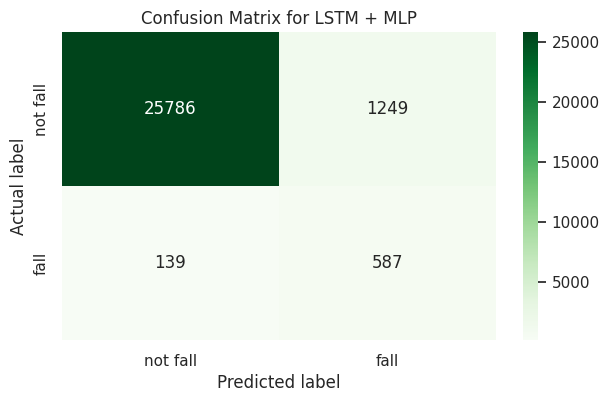


CPU times: user 19.5 s, sys: 1.74 s, total: 21.3 s
Wall time: 8.99 s


In [16]:
%%time
print('3. Evaluation...')
prediction = train_evaluate_deep.evaluate(LSTM_model, X_test, y_test, batch_size=128, threshold=0.9, title='LSTM + MLP', model_name='LSTM + MLP', plot=False)


In [17]:
plot_learning_curves=False
if plot_learning_curves:
  print('4. Plot learning curves...')
  _ = train_evaluate_deep.plot_learning_curves(LSTM_history)

#### MLP

In [18]:
print('1. Build Model...')
mlp_model = train_evaluate_deep.build_mlp(input_size=X_train.shape[1:], hidden_layer_size=128, output_size=1)

1. Build Model...


In [46]:
mlp_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 9)]          0         
                                                                 
 dense_8 (Dense)             (None, 200, 32)           320       
                                                                 
 dense_9 (Dense)             (None, 200, 64)           2112      
                                                                 
 dense_10 (Dense)            (None, 200, 128)          8320      
                                                                 
 flatten_2 (Flatten)         (None, 25600)             0         
                                                                 
 dense_11 (Dense)            (None, 512)               13107712  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0   

In [19]:
%%time
print('2. Train Model...')
mlp_history = train_evaluate_deep.train_deep_model(mlp_model,
                                                   X_train,
                                                   y_train,
                                                   optimizer=tf.optimizers.SGD(learning_rate=0.001),
                                                   loss_function=keras.losses.BinaryCrossentropy(),
                                                   callbacks=[get_early_stopping(metric='val_PRC', patience=10, mode='max')],
                                                   metrics=get_classifiaction_metrics(),
                                                   class_weight=class_weight,
                                                   epochs=30)

2. Train Model...
----------------------------------
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 9)]          0         
                                                                 
 dense_8 (Dense)             (None, 200, 32)           320       
                                                                 
 dense_9 (Dense)             (None, 200, 64)           2112      
                                                                 
 dense_10 (Dense)            (None, 200, 128)          8320      
                                                                 
 flatten_2 (Flatten)         (None, 25600)             0         
                                                                 
 dense_11 (Dense)            (None, 512)               13107712  
                                                                 
 dropo

3. Evaluation...
217/217 [==============================] - 1s 6ms/step



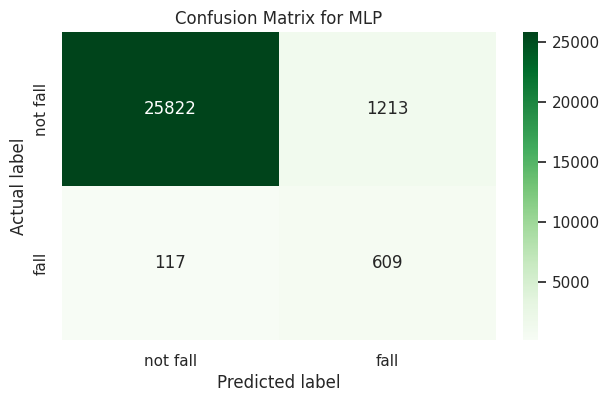


CPU times: user 17.5 s, sys: 348 ms, total: 17.9 s
Wall time: 1.6 s


In [20]:
%%time
print('3. Evaluation...')
prediction = train_evaluate_deep.evaluate(mlp_model, X_test, y_test, batch_size=128, threshold=0.9, title='MLP', model_name='MLP', plot=False)

In [21]:
plot_learning_curves=False
if plot_learning_curves:
  print('4. Plot learning curves...')
  _ = train_evaluate_deep.plot_learning_curves(mlp_history)

### Conclusion

In [22]:
convert_report_df(results)

,precision_0,recall_0,f1-score_0,support_0,precision_1,recall_1,f1-score_1,support_1,accuracy,precision_macro avg,recall_macro avg,f1-score_macro avg,support_macro avg,precision_weighted avg,recall_weighted avg,f1-score_weighted avg,support_weighted avg
Logistic Regression,0.994651,0.900980,0.945501,27035.000000,0.181846,0.819559,0.297649,726.000000,0.898851,0.588248,0.860270,0.621575,27761.000000,0.973394,0.898851,0.928559,27761.000000
Random Forest,0.989665,0.998890,0.994256,27035.000000,0.936709,0.611570,0.740000,726.000000,0.988761,0.963187,0.805230,0.867128,27761.000000,0.988280,0.988761,0.987607,27761.000000
KNN,0.986489,0.999297,0.992852,27035.000000,0.949333,0.490358,0.646685,726.000000,0.985988,0.967911,0.744828,0.819768,27761.000000,0.985518,0.985988,0.983799,27761.000000
Decision Tree,0.989074,0.957611,0.973088,27035.000000,0.277427,0.606061,0.380623,726.000000,0.948417,0.633251,0.781836,0.676855,27761.000000,0.970463,0.948417,0.957594,27761.000000
CNN + MLP,0.996267,0.957574,0.976537,27035.000000,0.354167,0.866391,0.502798,726.000000,0.955189,0.675217,0.911982,0.739667,27761.000000,0.979475,0.955189,0.964148,27761.000000
LSTM + MLP,0.994638,0.953801,0.973792,27035.000000,0.319717,0.808540,0.458236,726.000000,0.950002,0.657178,0.881170,0.716014,27761.000000,0.976988,0.950002,0.960309,27761.000000
MLP,0.995489,0.955132,0.974893,27035.000000,0.334248,0.838843,0.478022,726.000000,0.952091,0.664869,0.896988,0.726458,27761.000000,0.978197,0.952091,0.961899,27761.000000


In [23]:
save_pickle(predictions, Result_Export_Path + 'all_predictions.pkl')
save_pickle(results, Result_Export_Path + 'all_results.pkl')

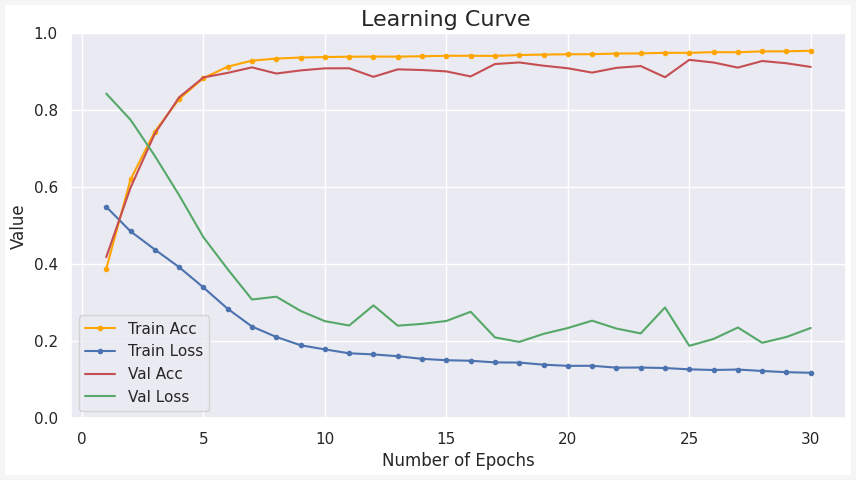

In [ ]:
plot_history(cnn_history)

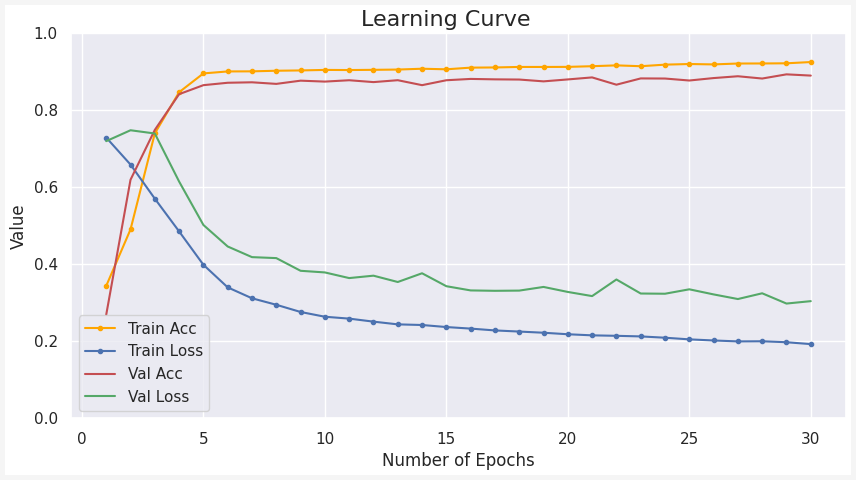

In [32]:
plot_history(LSTM_history)

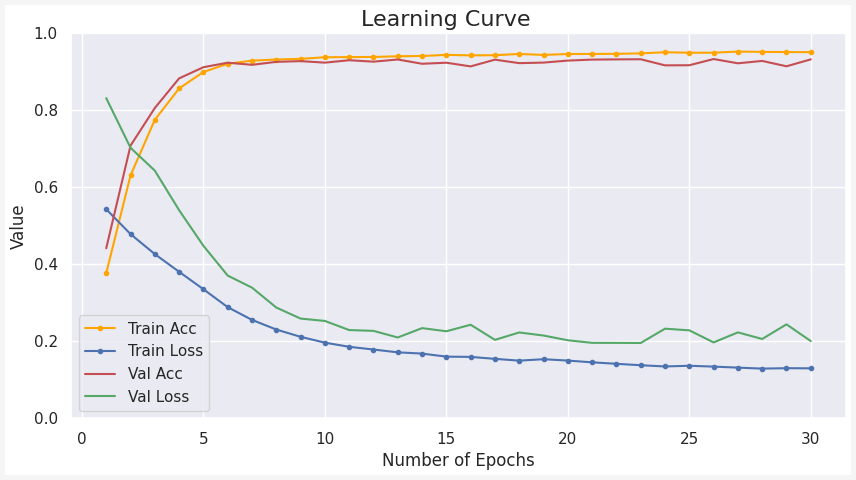

In [33]:
plot_history(mlp_history)

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim

class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_dim, nhead=4, num_layers=2, hidden_dim=128, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.embedding = nn.Linear(feature_dim, hidden_dim)
        self.positional_encoding = nn.Parameter(torch.zeros(1, 200, hidden_dim))  # assuming max seq_len <= 1000
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=nhead, dropout=dropout),
            num_layers=num_layers
        )
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x shape: (batch_size, seq_len, feature_dim)
        seq_len = x.size(1)
        x = self.embedding(x) + self.positional_encoding[:, :seq_len, :]
        # Transformer expects input shape (seq_len, batch_size, feature_dim)
        x = x.permute(1, 0, 2)
        x = self.transformer_encoder(x)
        x = x.mean(dim=0)  # Global average pooling across sequence
        x = self.fc(x)
        x = self.sigmoid(x)
        return x
feature_dim = 9  # replace with actual feature dimension
model = TimeSeriesTransformer(feature_dim)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.0005)
device = 'cuda:0'
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")
model.to(device)


Total parameters: 1213057


TimeSeriesTransformer(
  (embedding): Linear(in_features=9, out_features=128, bias=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:

import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Set batch size
batch_size = 128

# Create DataLoader for batching the data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [35]:
%%time
import time
trans_history = {
    'Accuracy': [],
    'loss': [],
    'val_Accuracy': [],
    'val_loss': []
}
# Training and evaluation loop
num_epochs = 10  # You can adjust this as needed
for epoch in range(num_epochs):
    start_time = time.time()  # Start timing
    # Training phase
    model.train()
    train_loss = 0.0
    correct_train = 0
    for X_batch, y_batch in train_loader:

        # Move data to the same device as the model
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()  # Squeeze to match the shape of y_batch

        # Compute the loss
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate the training loss
        train_loss += loss.item() * X_batch.size(0)  # multiply by batch size to get total loss for the batch
        predicted = (outputs >= 0.5).float()
        correct_train += (predicted == y_batch).sum().item()

    # Calculate average loss and accuracy for the training set
    train_loss /= len(train_loader.dataset)
    train_accuracy = correct_train / len(train_loader.dataset)

    # Evaluation phase
    model.eval()
    test_loss = 0.0
    correct_test = 0
    all_test_predictions = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            test_loss += loss.item() * X_batch.size(0)

            # Convert model output probabilities to binary predictions (0 or 1)
            predicted = (outputs >= 0.5).float()
            correct_test += (predicted == y_batch).sum().item()

            # Save all predictions
            all_test_predictions.extend(predicted.cpu().numpy())
    # Calculate average test loss and accuracy
    test_loss /= len(test_loader.dataset)
    test_accuracy = correct_test / len(test_loader.dataset)

    # Store metrics in history dictionary
    trans_history['Accuracy'].append(train_accuracy)
    trans_history['loss'].append(train_loss)
    trans_history['val_Accuracy'].append(test_accuracy)
    trans_history['val_loss'].append(test_loss)

    # Calculate and print epoch time
    epoch_time = time.time() - start_time
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, "
          f"Test Loss: {test_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, "
          f"Test Accuracy: {test_accuracy:.4f}, "
          f"Time: {epoch_time:.2f} seconds")

print("Training complete!")

Epoch [1/10], Train Loss: 0.0697, Test Loss: 0.0660, Train Accuracy: 0.9750, Test Accuracy: 0.9809, Time: 17.93 seconds
Epoch [2/10], Train Loss: 0.0493, Test Loss: 0.0562, Train Accuracy: 0.9832, Test Accuracy: 0.9878, Time: 17.94 seconds
Epoch [3/10], Train Loss: 0.0453, Test Loss: 0.0407, Train Accuracy: 0.9841, Test Accuracy: 0.9897, Time: 17.97 seconds
Epoch [4/10], Train Loss: 0.0424, Test Loss: 0.0882, Train Accuracy: 0.9853, Test Accuracy: 0.9597, Time: 18.08 seconds
Epoch [5/10], Train Loss: 0.0398, Test Loss: 0.0445, Train Accuracy: 0.9866, Test Accuracy: 0.9877, Time: 18.05 seconds
Epoch [6/10], Train Loss: 0.0369, Test Loss: 0.0404, Train Accuracy: 0.9870, Test Accuracy: 0.9871, Time: 18.30 seconds
Epoch [7/10], Train Loss: 0.0368, Test Loss: 0.0608, Train Accuracy: 0.9878, Test Accuracy: 0.9775, Time: 18.03 seconds
Epoch [8/10], Train Loss: 0.0360, Test Loss: 0.0626, Train Accuracy: 0.9880, Test Accuracy: 0.9752, Time: 18.15 seconds
Epoch [9/10], Train Loss: 0.0331, Test L

1) Plot ROC Curve...



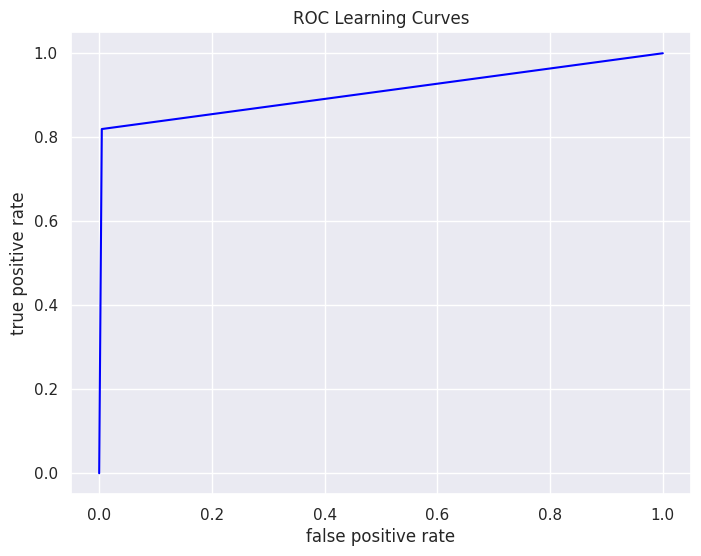


2) Plot AUC Curve...



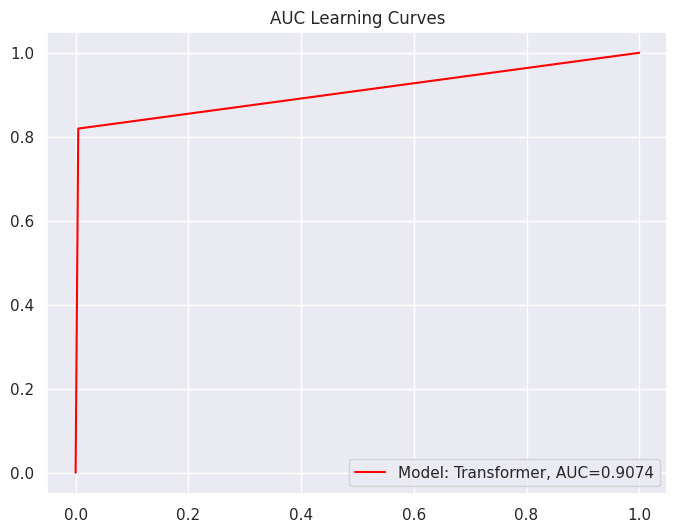


3) Plot Percision_Recall Curve......



<Figure size 800x600 with 0 Axes>

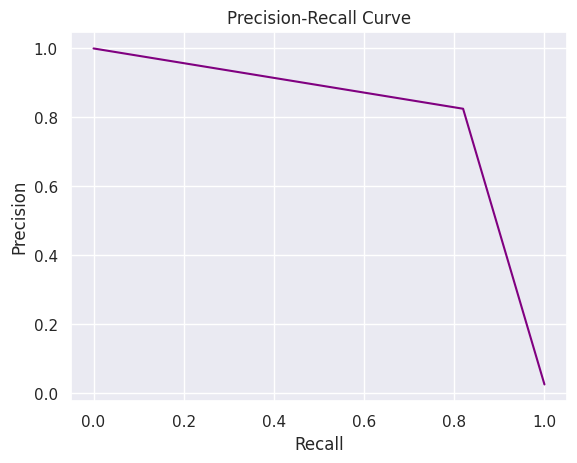

Class Report: {'0': {'precision': 0.9951553254437869, 'recall': 0.995339374884409, 'f1-score': 0.9952473416551086, 'support': 27035}, '1': {'precision': 0.8252427184466019, 'recall': 0.8195592286501377, 'f1-score': 0.8223911541119557, 'support': 726}, 'accuracy': 0.9907424084146824, 'macro avg': {'precision': 0.9101990219451944, 'recall': 0.9074493017672733, 'f1-score': 0.9088192478835322, 'support': 27761}, 'weighted avg': {'precision': 0.99071180566136, 'recall': 0.9907424084146824, 'f1-score': 0.9907268419556624, 'support': 27761}}



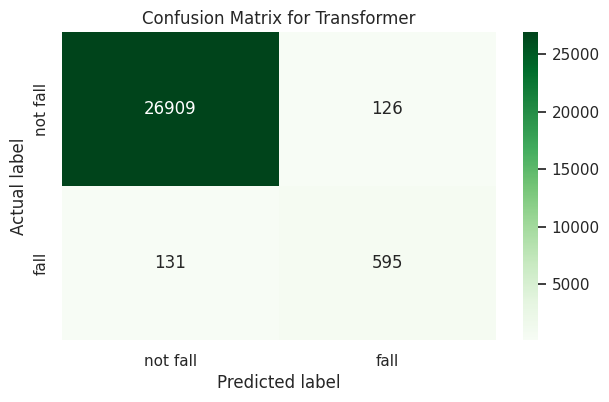

In [68]:
from utils import *
model_name = 'Transformer'
title = 'Transformer'
prediction = np.array(all_test_predictions)
print('1) Plot ROC Curve...')
print()
plot_roc_curve(y_test, prediction, title='ROC Curve of {model_name} Model'.format(model_name=model_name), model_name=model_name, file_name=None)
print()
print('2) Plot AUC Curve...')
print()
plot_auc_curve(y_test, prediction, title='AUC Curve of {model_name} Model'.format(model_name=model_name), model_name=model_name, file_name = None)
print()
print('3) Plot Percision_Recall Curve......')
print()
plot_precision_recall_curve(y_test, prediction, title='Percision_Recall Curve of {model_name} Model'.format(model_name=model_name), model_name=model_name, file_name=None)
report = classification_report(y_test, prediction, output_dict=True)
print('Class Report:', report)
print()
plot_confusion_matrix(confusion_matrix(y_test, prediction), title=title)
print()

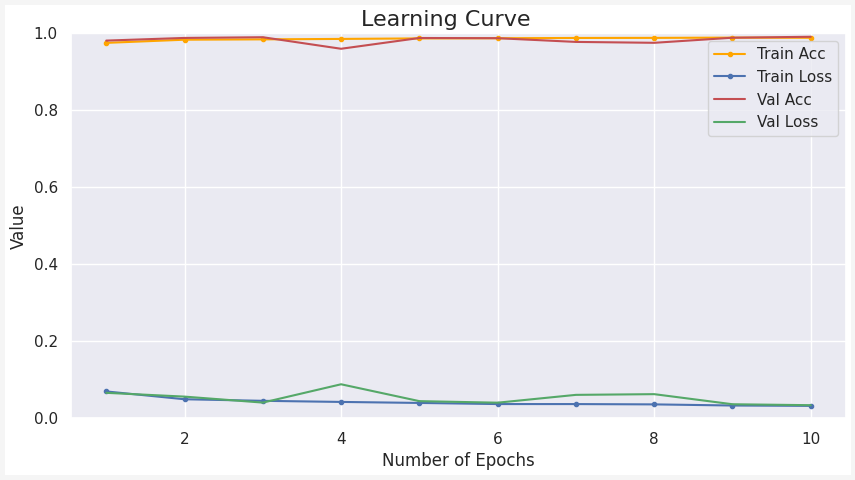

In [37]:
class History:
    def __init__(self, history):
        self.history = history
trans_history_class = History(trans_history)
plot_history(trans_history_class)

In [70]:
predictions = load_pickle(Result_Export_Path + 'all_predictions.pkl')
results = load_pickle( Result_Export_Path + 'all_results.pkl')
results['Transformer'] = report

In [71]:
convert_report_df(results)


,precision_0,recall_0,f1-score_0,support_0,precision_1,recall_1,f1-score_1,support_1,accuracy,precision_macro avg,recall_macro avg,f1-score_macro avg,support_macro avg,precision_weighted avg,recall_weighted avg,f1-score_weighted avg,support_weighted avg
Logistic Regression,0.994651,0.900980,0.945501,27035.000000,0.181846,0.819559,0.297649,726.000000,0.898851,0.588248,0.860270,0.621575,27761.000000,0.973394,0.898851,0.928559,27761.000000
Random Forest,0.989665,0.998890,0.994256,27035.000000,0.936709,0.611570,0.740000,726.000000,0.988761,0.963187,0.805230,0.867128,27761.000000,0.988280,0.988761,0.987607,27761.000000
KNN,0.986489,0.999297,0.992852,27035.000000,0.949333,0.490358,0.646685,726.000000,0.985988,0.967911,0.744828,0.819768,27761.000000,0.985518,0.985988,0.983799,27761.000000
Decision Tree,0.989074,0.957611,0.973088,27035.000000,0.277427,0.606061,0.380623,726.000000,0.948417,0.633251,0.781836,0.676855,27761.000000,0.970463,0.948417,0.957594,27761.000000
CNN + MLP,0.996267,0.957574,0.976537,27035.000000,0.354167,0.866391,0.502798,726.000000,0.955189,0.675217,0.911982,0.739667,27761.000000,0.979475,0.955189,0.964148,27761.000000
LSTM + MLP,0.994638,0.953801,0.973792,27035.000000,0.319717,0.808540,0.458236,726.000000,0.950002,0.657178,0.881170,0.716014,27761.000000,0.976988,0.950002,0.960309,27761.000000
MLP,0.995489,0.955132,0.974893,27035.000000,0.334248,0.838843,0.478022,726.000000,0.952091,0.664869,0.896988,0.726458,27761.000000,0.978197,0.952091,0.961899,27761.000000
Transformer,0.995155,0.995339,0.995247,27035.000000,0.825243,0.819559,0.822391,726.000000,0.990742,0.910199,0.907449,0.908819,27761.000000,0.990712,0.990742,0.990727,27761.000000


In [60]:
#save transformer model weights
save_pickle(results, Result_Export_Path + 'all_results_trans_1layer8epoch.pkl')
torch.save(model.state_dict(), 'weights/transformer_model_1layer_8epoch.pth')

In [ ]:
#Load results across different transformers
trans_1layer_10epoch_results = load_pickle('Results/all_results_trans_1layer10epoch.pkl')
trans_2layer_10epoch_results = load_pickle('Results/all_results_trans_2layer10epoch.pkl')
trans_3layer_10epoch_results = load_pickle('Results/all_results_trans_3layer10epoch.pkl')

In [14]:
trans_1layer = trans_1layer_10epoch_results['Transformer']
trans_2layer = trans_2layer_10epoch_results['Transformer']
trans_3layer = trans_3layer_10epoch_results['Transformer']

In [25]:
trans_all = load_pickle('Results/all_results_trans_1layer10epoch.pkl')
# remove the transformer results
trans_all['Transformer1'] = trans_1layer
trans_all['Transformer2'] = trans_2layer
trans_all['Transformer3'] = trans_3layer
del trans_all['Transformer']
df = convert_report_df(trans_all)
df

,precision_0,recall_0,f1-score_0,support_0,precision_1,recall_1,f1-score_1,support_1,accuracy,precision_macro avg,recall_macro avg,f1-score_macro avg,support_macro avg,precision_weighted avg,recall_weighted avg,f1-score_weighted avg,support_weighted avg
Logistic Regression,0.994651,0.900980,0.945501,27035.000000,0.181846,0.819559,0.297649,726.000000,0.898851,0.588248,0.860270,0.621575,27761.000000,0.973394,0.898851,0.928559,27761.000000
Random Forest,0.989665,0.998890,0.994256,27035.000000,0.936709,0.611570,0.740000,726.000000,0.988761,0.963187,0.805230,0.867128,27761.000000,0.988280,0.988761,0.987607,27761.000000
KNN,0.986489,0.999297,0.992852,27035.000000,0.949333,0.490358,0.646685,726.000000,0.985988,0.967911,0.744828,0.819768,27761.000000,0.985518,0.985988,0.983799,27761.000000
Decision Tree,0.989074,0.957611,0.973088,27035.000000,0.277427,0.606061,0.380623,726.000000,0.948417,0.633251,0.781836,0.676855,27761.000000,0.970463,0.948417,0.957594,27761.000000
CNN + MLP,0.996267,0.957574,0.976537,27035.000000,0.354167,0.866391,0.502798,726.000000,0.955189,0.675217,0.911982,0.739667,27761.000000,0.979475,0.955189,0.964148,27761.000000
LSTM + MLP,0.994638,0.953801,0.973792,27035.000000,0.319717,0.808540,0.458236,726.000000,0.950002,0.657178,0.881170,0.716014,27761.000000,0.976988,0.950002,0.960309,27761.000000
MLP,0.995489,0.955132,0.974893,27035.000000,0.334248,0.838843,0.478022,726.000000,0.952091,0.664869,0.896988,0.726458,27761.000000,0.978197,0.952091,0.961899,27761.000000
Transformer1,0.995999,0.994378,0.995188,27035.000000,0.802597,0.851240,0.826203,726.000000,0.990634,0.899298,0.922809,0.910695,27761.000000,0.990941,0.990634,0.990768,27761.000000
Transformer2,0.995200,0.997078,0.996138,27035.000000,0.882963,0.820937,0.850821,726.000000,0.992471,0.939082,0.909007,0.923480,27761.000000,0.992265,0.992471,0.992338,27761.000000
Transformer3,0.993586,0.997041,0.995311,27035.000000,0.873418,0.760331,0.812960,726.000000,0.990850,0.933502,0.878686,0.904135,27761.000000,0.990444,0.990850,0.990542,27761.000000
